# Astropy Introduction  Введение в astropy

Astropy is a set of python functions designed to be helpful for astronomers.  Most of the astropy functions we will use are for reading fits files and converting between different coordinates in the sky.  Let's start by using astropy.io to examine the data stored in a fits file. 

Astropy - это набор функций python, предназначенных для астрономов.  Большинство функций astropy, которые мы будем использовать, предназначены для чтения файлов fits и преобразования между различными координатами на небе.  Давайте начнем с использования astropy.io для изучения данных, хранящихся в fits-файле. 

In [1]:
from astropy.io import fits

We will also need a fits file to work with, let's use one from the astropy dataset.

Нам также понадобится fits-файл для работы, давайте воспользуемся файлом из набора данных astropy.

In [2]:
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

In order to view, examine, and manipulate the data in this image, we first need to open it!  We can do that using the fits.open() function.  This function reads a fits file, and just needs the name of a file as input.  Once it is loaded, we can examine the type of information in this fits file with the info() command.

Чтобы просматривать, изучать и манипулировать данными на этом изображении, нам сначала нужно его открыть!  Мы можем сделать это с помощью функции fits.open().  Эта функция считывает файл fits, и в качестве входных данных ей нужно только имя файла.  После загрузки мы можем изучить тип информации в этом fits-файле с помощью команды info().

In [3]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /home/kv/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


The info command tells us that there are two frames in our fits file, the primary science frame that will have the imaging data along with a data table called er.mask that probably has some information about how this image was processed.  We will be working with the image data in the 0th frame.  The dimensions tell us that this is image is 891x893 pixels.

Команда info сообщает нам, что в нашем fits-файле есть два кадра: основной научный кадр, в котором будут данные съемки, а также таблица данных er.mask, в которой, вероятно, есть информация о том, как было обработано изображение.  Мы будем работать с данными изображения в 0-м кадре.  Размеры говорят нам, что это изображение имеет размер 891x893 пикселей.

Now that we know this, we can read in the data from the zeroth frame to get the info on this image.

Теперь, когда мы знаем это, мы можем считать данные из нулевого кадра, чтобы получить информацию об этом изображении.

In [5]:
image_data = hdu_list[0].data

Another nice thing we can do with astropy.io is read all the information from the header.  We can do this using the .header command, which pulls out all the header data and stores it in a dataframe.  

Еще одна хорошая вещь, которую мы можем сделать с помощью astropy.io, - это прочитать всю информацию из заголовка.  Мы можем сделать это с помощью команды .header, которая извлекает все данные заголовка и сохраняет их в рамке данных.  

In [5]:
header = hdu_list[0].header
header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

The header stores all kinds of important information about the image, like the date it was taken, the size of the pixels, and the information necessary to determine where in the sky the image is.  For example, the header will have the RA and Dec of the central pixel, which we can read in from our header dataframe.

В заголовке хранится различная важная информация об изображении, например, дата съемки, размер пикселей и информация, необходимая для определения местоположения изображения на небе.  Например, в заголовке будут указаны RA и Dec центрального пикселя, которые мы можем считать из нашего блока данных заголовка.

In [7]:
RA = header['PLATERA']
print(RA)

85.599455


The exact names of the information stored in the header will change depending on the telescope/program, so you do have to be careful.  But astropy has a nice package that can look through all the data in the header to get the 'World Coordinant System,' or WCS, information from the header that will allow us to convert easily between sky coordinants (RA, Dec) and pixel positions.  

Точные названия информации, хранящейся в заголовке, меняются в зависимости от телескопа/программы, поэтому нужно быть внимательным.  Но в astropy есть хороший пакет, который может просмотреть все данные в заголовке и получить из него информацию о 'World Coordinant System', или WCS, которая позволит нам легко совершать переход между небесными координатами (RA, Dec) и номерами пикселей.  

In [8]:
from astropy.wcs import WCS
wcs = WCS(header)

Now we have the information about how to convert between pixel and sky coordinants stored in a variable called wcs, which we can use to extract fluxes from specific locations in the sky!

Теперь у нас есть информация о том, как преобразовать координаты пикселя в небесные, которая хранится в переменной wcs, которую мы можем использовать для извлечения потоков из определенных мест на небе!

Okay.  We've gotten some info from the header, let's look at what our fits file is actually an image of!  We can do this using the matplotlib.pyplot function imshow, which plots 2D arrays like our imaging data.

Мы получили некоторую информацию из заголовка, давайте посмотрим, что на самом деле представляет собой наш файл fits!  Мы можем сделать это с помощью функции matplotlib.pyplot imshow, которая строит графики двумерных массивов, подобных нашим данным визуализации.

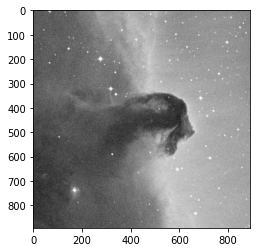

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap='gray', norm=LogNorm())

It's the horsehead nebula in Orion!  Neat, huh?   

Это туманность Конская голова в Орионе!  Здорово, да?   

The horsehead nebula is at RA of 5hr 40min 54s and a dec of -02degrees 27minutes 30seconds.  We can use astropy's coordinants package to make a special variable called a sky coord centered on this position on the sky.

Туманность Конская голова находится на прямом восхождении 5 часов 40 минут 54 секунды и склонении -02 градуса 27 минут 30 секунд.  Мы можем использовать пакет astropy's coordinates для создания специальной переменной sky coord, центрированной на этом положении на небе.

In [10]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
horsehead_center = SkyCoord('05h40m54.0s', '-02d27m30.0s', frame='icrs')  # passing in string format
print(horsehead_center)

<SkyCoord (ICRS): (ra, dec) in deg
    (85.225, -2.45833333)>


SkyCoord objects are great because they let us easily switch between types of coordinants.  For example, I entered RA in hr,min,sec, but the skycoord program is able to convert that to degrees.  We can also convert to other coordinant systems fairly easily when we use skycoord:

Объекты SkyCoord замечательны тем, что позволяют нам легко переключаться между типами координат.  Например, я ввел RA в формате hr,min,sec, но программа skycoord может преобразовать его в градусы.  Кроме того, с помощью skycoord мы можем легко конвертировать в другие системы координат:

In [11]:
horsehead_center.galactic

<SkyCoord (Galactic): (l, b) in deg
    (206.94603198, -16.79368854)>

Which is the location of the horsehead nebula in galactic coordinants!  And we didn't have to do any trig to figure that out!

Что является местоположением туманности Конская голова в галактических координатах!  И нам не нужно было делать никаких тригонометрических расчетов, чтобы получить это!

Since we have the wcs information from the header of our horsehead nebula image, we can also convert this to a pixel location and plot a circle around the center using the command:

Поскольку у нас есть информация wcs из заголовка нашего изображения туманности Конская голова, мы также можем преобразовать ее в расположение пикселей и построить окружность вокруг центра с помощью команды:

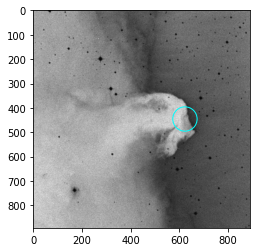

In [12]:
coords = wcs.wcs_world2pix(horsehead_center.ra, horsehead_center.dec, 0)
circle = plt.Circle((coords[0], coords[1]), 50, color='cyan', fill=False)
fig, ax = plt.subplots()
ax.add_artist(circle)
ax.imshow(image_data, cmap='gray_r', norm=LogNorm())

In the code above, I used the astropy.wcs program to transform the ra and dec in the skycoord object horsehead_center to a pixel location in our image.  Coords is a list with the form [x_pixel, y_pixel].  After I know where on the image in pixel-space the center of the horsehead nebula is, I can use matplotlib to plop a cirle with a 50 pixel radius down around that spot.  

В приведенном выше коде я использовал программу astropy.wcs для преобразования значений ra и dec в объекте skycoord horsehead_center в расположение пикселей на нашем изображении.  Coords - это список вида [x_pixel, y_pixel].  После того как я узнаю, где на изображении в пиксельном пространстве находится центр туманности Конская голова, я могу использовать matplotlib для построения круга радиусом 50 пикселей вокруг этого места.  

Astropy has a lot of other great packages, but these are the main ones we will use over and over in this class.  If you want to learn more about astropy, check out the tutorials available here:
http://learn.astropy.org/

В Astropy есть много других замечательных пакетов, но это основные, которые мы будем использовать снова и снова в этом классе.  Если вы хотите узнать больше об astropy, ознакомьтесь с учебниками, доступными здесь:
http://learn.astropy.org/